In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Bidirectional
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.initializers import Orthogonal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pywt
from keras import regularizers
from keras.regularizers import l2
import pandas as pd

Converting the dataset format to "csv" 

In [2]:
excel_file_path = '/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/Apparel_Sales_Data.xlsx'
csv_output_path = '/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/Apparel_Sales_Data.csv'

In [3]:
# Read the Excel file into a Pandas DataFrame
initial_data = pd.read_excel(excel_file_path)

# Save the DataFrame to a CSV file
initial_data.to_csv(csv_output_path, index=False)

In [4]:
file_path = '/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/Apparel_Sales_Data.csv'
df = pd.read_csv(file_path)

In [5]:
df.to_csv('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/Apparel_Sales_Data.csv', index=False)

Data Preprocessing

In [6]:
# Load dataset
df = pd.read_csv('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/Apparel_Sales_Data.csv')

Data Exploration

In [7]:
# Examine data
df.head()
df.info()
df.isnull().sum().sort_values(ascending=False)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Order            20674 non-null  int64  
 1   Dist.Chl.Name             20674 non-null  object 
 2   Material Group            20674 non-null  object 
 3   FG Type                   20674 non-null  object 
 4   FG Type Desc.             20674 non-null  object 
 5   Construction              20674 non-null  object 
 6   Fabrication               20674 non-null  object 
 7   Design Source             20674 non-null  object 
 8   Business Source           20674 non-null  object 
 9   Customer Group            20674 non-null  object 
 10  Customer                  20674 non-null  object 
 11  Gender                    20674 non-null  object 
 12  Global Style              20668 non-null  object 
 13  FG SKU                    20668 non-null  object 
 14  Cust.C

FG SKU                      6
Global Style                6
Customer Order              0
Destination                 0
Sales Unit                  0
FOB                         0
Total FOB                   0
SO Doc.Currency             0
Req.Delivery Date           0
Size                        0
RM In Date                  0
Planned Cut Date            0
Original Ex.Factory Date    0
Revised Ex.Factory Date     0
Program Type                0
Program Type Desc.          0
Order Qty                   0
Season Year                 0
Dist.Chl.Name               0
Season                      0
Cust.Color Code             0
Gender                      0
Customer                    0
Customer Group              0
Business Source             0
Design Source               0
Fabrication                 0
Construction                0
FG Type Desc.               0
FG Type                     0
Material Group              0
Pack Qty                    0
dtype: int64

In [8]:
df.head()

,Customer Order,Dist.Chl.Name,Material Group,FG Type,FG Type Desc.,Construction,Fabrication,Design Source,Business Source,Customer Group,...,SO Doc.Currency,Destination,Req.Delivery Date,RM In Date,Planned Cut Date,Original Ex.Factory Date,Revised Ex.Factory Date,Program Type,Program Type Desc.,Pack Qty
0,867536001,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
1,867536002,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
2,867536003,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
3,867536004,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
4,867536005,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-12-16,2022-12-23,2023-05-12,2023-05-17,R01,REGULAR,0


In [9]:
df.columns

Index(['Customer Order', 'Dist.Chl.Name', 'Material Group', 'FG Type',
       'FG Type Desc.', 'Construction', 'Fabrication', 'Design Source',
       'Business Source', 'Customer Group', 'Customer', 'Gender',
       'Global Style', 'FG SKU', 'Cust.Color Code', 'Season', 'Season Year',
       'Size', 'Order Qty', 'Sales Unit', 'FOB', 'Total FOB',
       'SO Doc.Currency', 'Destination', 'Req.Delivery Date', 'RM In Date',
       'Planned Cut Date', 'Original Ex.Factory Date',
       'Revised Ex.Factory Date', 'Program Type', 'Program Type Desc.',
       'Pack Qty'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Order            20674 non-null  int64  
 1   Dist.Chl.Name             20674 non-null  object 
 2   Material Group            20674 non-null  object 
 3   FG Type                   20674 non-null  object 
 4   FG Type Desc.             20674 non-null  object 
 5   Construction              20674 non-null  object 
 6   Fabrication               20674 non-null  object 
 7   Design Source             20674 non-null  object 
 8   Business Source           20674 non-null  object 
 9   Customer Group            20674 non-null  object 
 10  Customer                  20674 non-null  object 
 11  Gender                    20674 non-null  object 
 12  Global Style              20668 non-null  object 
 13  FG SKU                    20668 non-null  object 
 14  Cust.C

In [11]:
df.isnull().sum()

Customer Order              0
Dist.Chl.Name               0
Material Group              0
FG Type                     0
FG Type Desc.               0
Construction                0
Fabrication                 0
Design Source               0
Business Source             0
Customer Group              0
Customer                    0
Gender                      0
Global Style                6
FG SKU                      6
Cust.Color Code             0
Season                      0
Season Year                 0
Size                        0
Order Qty                   0
Sales Unit                  0
FOB                         0
Total FOB                   0
SO Doc.Currency             0
Destination                 0
Req.Delivery Date           0
RM In Date                  0
Planned Cut Date            0
Original Ex.Factory Date    0
Revised Ex.Factory Date     0
Program Type                0
Program Type Desc.          0
Pack Qty                    0
dtype: int64

In [12]:
# Check the percentage of NaN in dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df['Global Style'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
FG SKU,6,0.00029
Global Style,6,0.00029
Customer Order,0,0.00000
Destination,0,0.00000
Sales Unit,0,0.00000
FOB,0,0.00000
Total FOB,0,0.00000
SO Doc.Currency,0,0.00000
Req.Delivery Date,0,0.00000
Size,0,0.00000


Visualization of Data

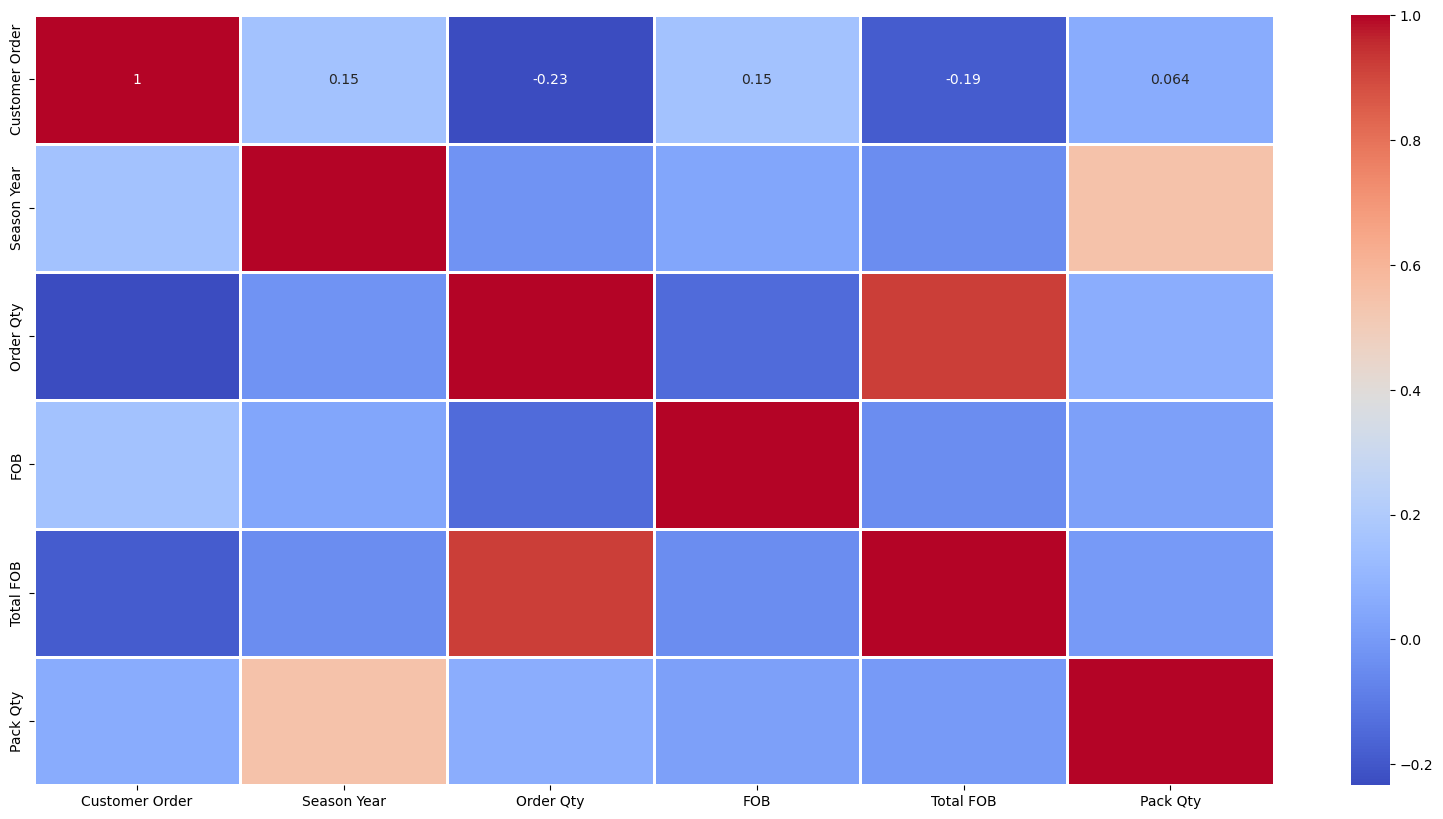

In [13]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True, linewidths=2, ax=ax)
plt.show()

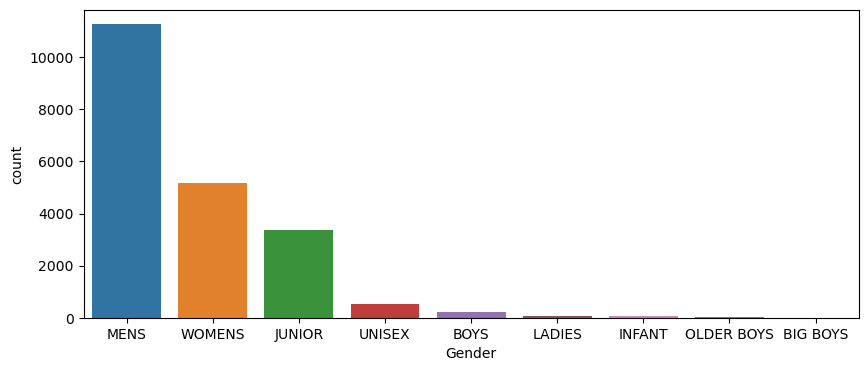

In [14]:
# Frequency of Gender
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index, ax=ax)
plt.show()

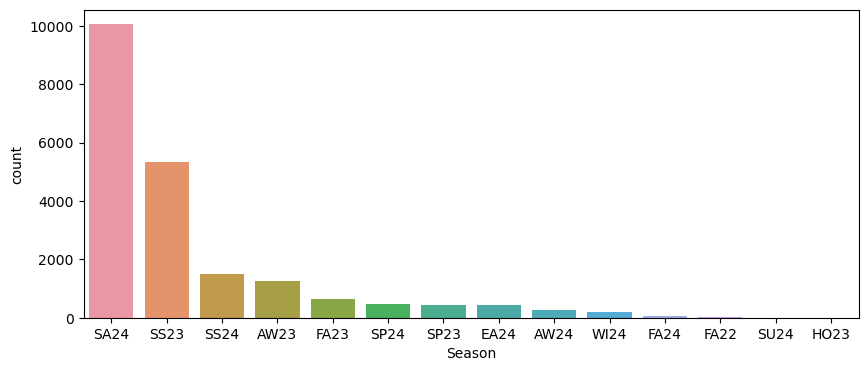

In [15]:
# Frequency of Season
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Season', data=df, order=df['Season'].value_counts().index, ax=ax)
plt.show()

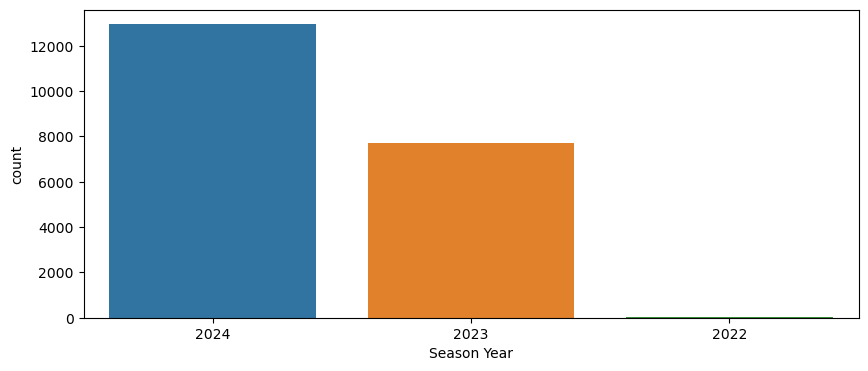

In [16]:
# Frequency of Year
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Season Year', data=df, order=df['Season Year'].value_counts().index, ax=ax)
plt.show()

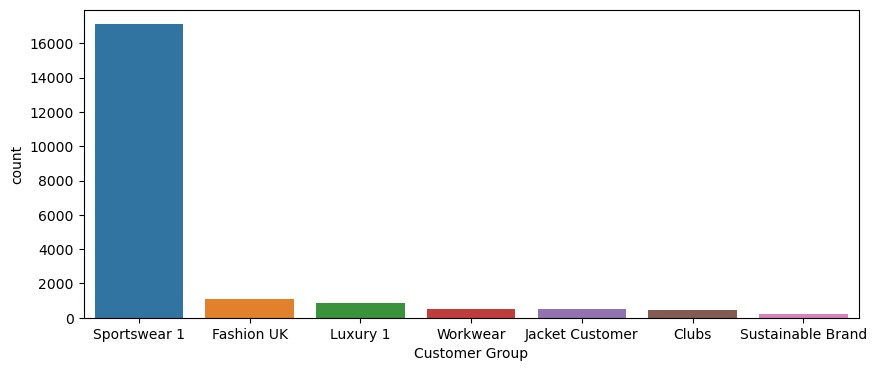

In [17]:
# Frequency of Customer Group
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Customer Group', data=df, order=df['Customer Group'].value_counts().index, ax=ax)
plt.show()

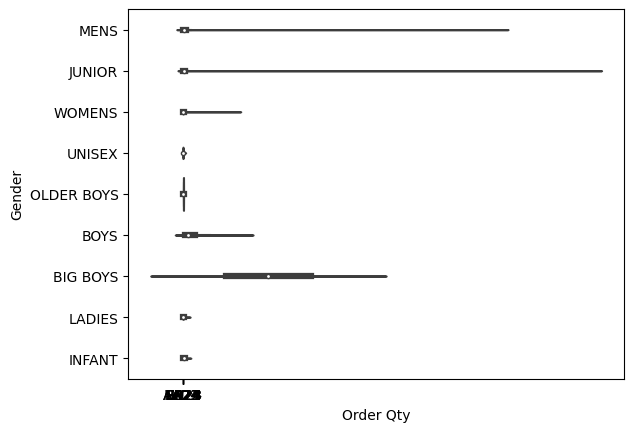

In [18]:
sns.countplot(x='Season', data=df)
sns.violinplot(x='Order Qty', y='Gender', data=df)
plt.show()

Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Order            20674 non-null  int64  
 1   Dist.Chl.Name             20674 non-null  object 
 2   Material Group            20674 non-null  object 
 3   FG Type                   20674 non-null  object 
 4   FG Type Desc.             20674 non-null  object 
 5   Construction              20674 non-null  object 
 6   Fabrication               20674 non-null  object 
 7   Design Source             20674 non-null  object 
 8   Business Source           20674 non-null  object 
 9   Customer Group            20674 non-null  object 
 10  Customer                  20674 non-null  object 
 11  Gender                    20674 non-null  object 
 12  Global Style              20668 non-null  object 
 13  FG SKU                    20668 non-null  object 
 14  Cust.C

In [20]:
# Remove duplicate rows
df = df.drop_duplicates()

In [21]:
# Convert date columns to datetime objects  
    
def convert_date_into_days(df):
    df['Req.Delivery Date'] = pd.to_datetime(df['Req.Delivery Date'])
    df['RM In Date'] = pd.to_datetime(df['RM In Date'])
    df['Planned Cut Date'] = pd.to_datetime(df['Planned Cut Date'])
    df['Original Ex.Factory Date'] = pd.to_datetime(df['Original Ex.Factory Date'])
    df['Revised Ex.Factory Date'] = pd.to_datetime(df['Revised Ex.Factory Date'])

    # Feature engineering
    df['Production Lead Time'] = (df['Original Ex.Factory Date'] - df['Planned Cut Date']).dt.days
    df['Revised Original Date Difference'] = (df['Revised Ex.Factory Date'] - df['Original Ex.Factory Date']).dt.days
    
    # Extract year, month, day of the 'Req.Delivery Date' column
    df['Order Day'] = df['Req.Delivery Date'].dt.day
    df['Order Year'] = df['Req.Delivery Date'].dt.year
    df['Order Month'] = df['Req.Delivery Date'].dt.month

In [22]:
convert_date_into_days(df)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Customer Order                    20674 non-null  int64         
 1   Dist.Chl.Name                     20674 non-null  object        
 2   Material Group                    20674 non-null  object        
 3   FG Type                           20674 non-null  object        
 4   FG Type Desc.                     20674 non-null  object        
 5   Construction                      20674 non-null  object        
 6   Fabrication                       20674 non-null  object        
 7   Design Source                     20674 non-null  object        
 8   Business Source                   20674 non-null  object        
 9   Customer Group                    20674 non-null  object        
 10  Customer                          20674 non-nu

In [24]:
# Check the percentage of NaN in dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df['FG SKU'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FG SKU,6,0.00029
Global Style,6,0.00029
Customer Order,0,0.00000
Original Ex.Factory Date,0,0.00000
SO Doc.Currency,0,0.00000
Destination,0,0.00000
Req.Delivery Date,0,0.00000
RM In Date,0,0.00000
Planned Cut Date,0,0.00000
Revised Ex.Factory Date,0,0.00000


In [25]:
# Drop rows without any values in all columns
df = df.dropna()

In [26]:
# Initialize a label encoder
le = LabelEncoder()

# Select columns to encode
columns_to_encode = ['Dist.Chl.Name', 'Material Group', 'FG Type', 'FG Type Desc.', 'Construction', 'Fabrication', 
                     'Design Source', 'Business Source', 'Customer Group', 'Customer', 'Gender', 'Global Style', 
                     'FG SKU', 'Cust.Color Code', 'Size', 'Season', 'Sales Unit', 'SO Doc.Currency', 'Destination', 
                     'Program Type', 'Program Type Desc.']

# Apply the label encoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [27]:
# Save the label encoder
import joblib

joblib.dump(le, '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/label_encoder.pkl')

['/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/label_encoder.pkl']

In [28]:
# Datetime columns
datetime_columns = ['Req.Delivery Date', 'RM In Date', 'Planned Cut Date', 'Original Ex.Factory Date', 'Revised Ex.Factory Date']

# Convert datetime columns to Unix timestamp
for column in datetime_columns:
    df[column] = pd.to_datetime(df[column]).astype(int) / 10**9

Correlation Matrix before PCA

/Users/amalshar/miniforge3/envs/tensorflow_env/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


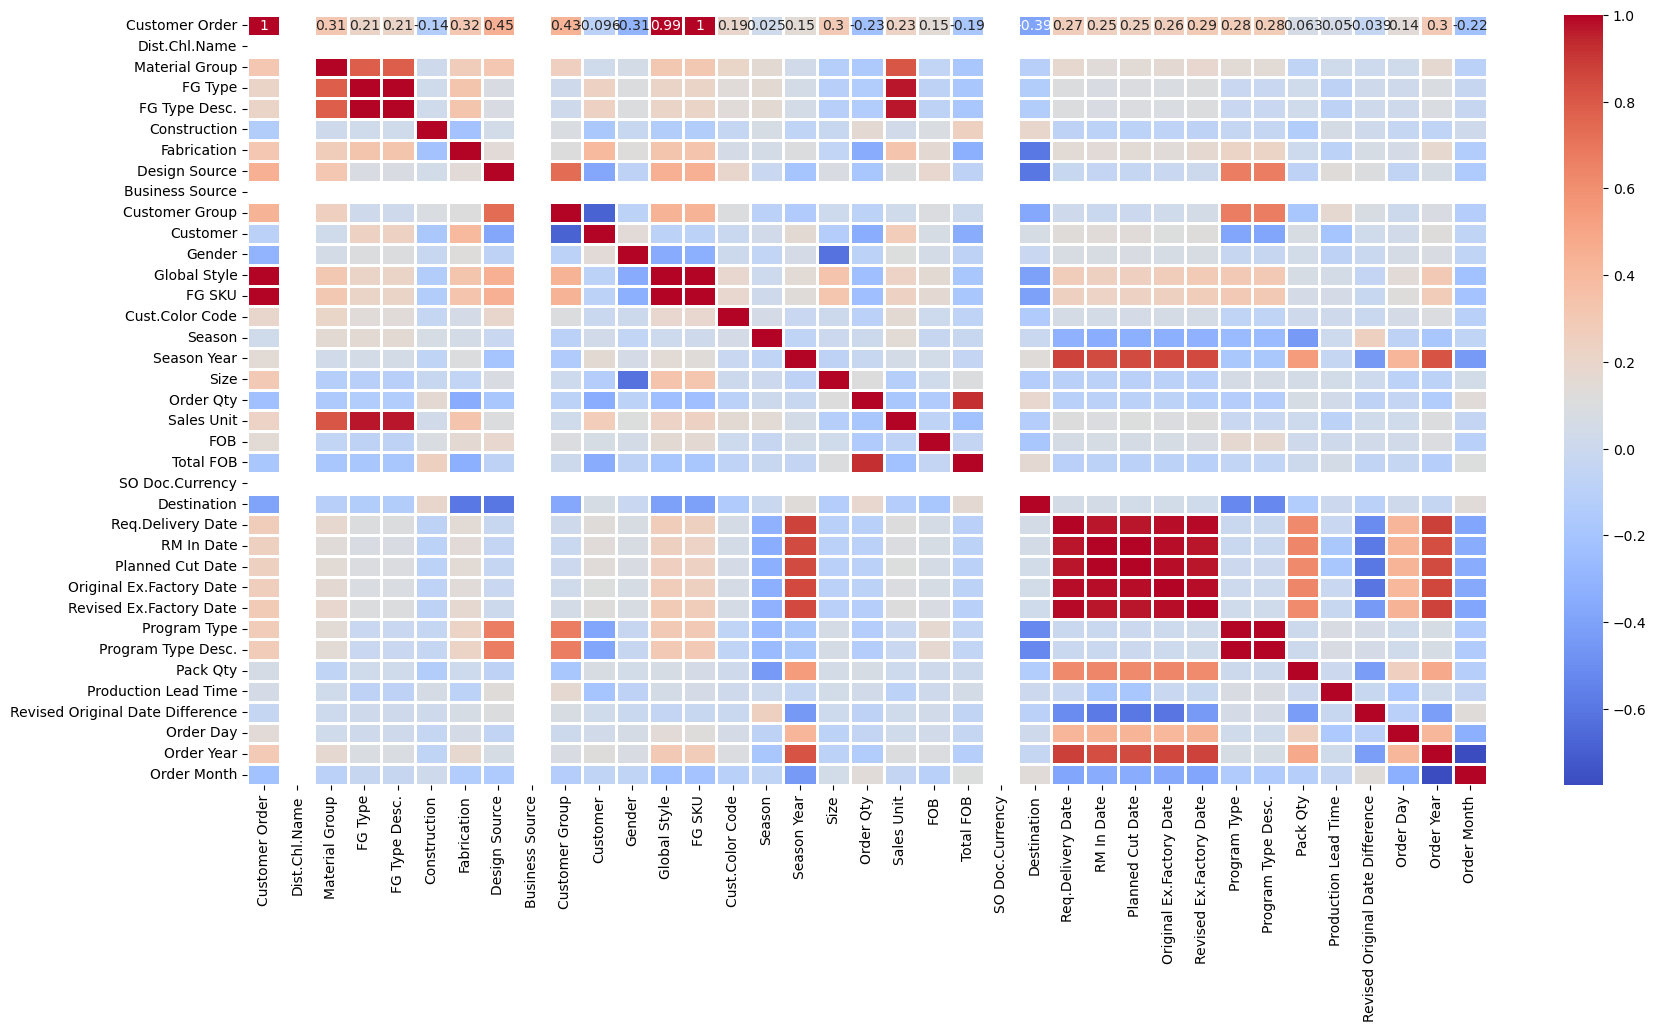

In [29]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix['Order Qty'].sort_values(ascending=False)

# Plot correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.show()

Correlation with the target variable before PCA

In [30]:
# corr_with_target = df_scaled[numeric_columns].corrwith(df_scaled['Order Qty']).sort_values(ascending=False)

# plt.figure(figsize=(5, 8))
# sns.heatmap(corr_with_target.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
# plt.title('Correlation with Target Variable Before PCA')
# plt.show()

Principle Componenet Analysis (PCA)

In [31]:
# Principal Component Analysis
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)


In [32]:
# # Separate the features (X) and target variable (y)
# X = numeric_df.drop('Order Qty', axis=1)  
# y = df['Order Qty']

# # Standardize the features for PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Apply PCA
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

In [33]:
# # Plot the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance_ratio = explained_variance_ratio.cumsum()

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
# plt.title('Explained Variance Ratio by Principal Components')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.grid(True)
# plt.show()

In [34]:
# num_components = 8  # Adjust based on the desired number of components
# pca = PCA(n_components=num_components)
# X_pca = pca.fit_transform(X_scaled)

# # Extract the loadings (coefficients) of each original feature in each principal component
# loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, num_components + 1)], index=X.columns)

# # Select features with the highest absolute loadings across all principal components
# selected_features = loadings_df.abs().max(axis=1).sort_values(ascending=False).index.tolist()

# # Print the selected features
# print("Selected Features:")
# print(selected_features)

In [35]:
df.to_csv('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/Preprocessed_Apparel_Sales_Data.csv', index=False, encoding='utf-8')

LSTM Model

In [36]:
# Load preprocessed data
preprocessed_data = '/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/Preprocessed_Apparel_Sales_Data.csv'
df = pd.read_csv(preprocessed_data)

In [37]:
# Define features and target variable
features = ['Customer Order', 'Dist.Chl.Name', 'Material Group', 'FG Type', 'FG Type Desc.', 'Construction', 'Fabrication', 'Design Source', 'Business Source', 'Customer Group', 'Customer', 'Gender', 'Global Style', 'FG SKU', 'Cust.Color Code', 'Season', 'Season Year', 'Size', 'Sales Unit', 'FOB', 'Total FOB', 'SO Doc.Currency', 'Destination', 'Req.Delivery Date', 'RM In Date', 'Planned Cut Date', 'Original Ex.Factory Date', 'Revised Ex.Factory Date', 'Program Type', 'Program Type Desc.', 'Pack Qty', 'Production Lead Time', 'Revised Original Date Difference', 'Order Day', 'Order Month', 'Order Year']

target = 'Order Qty'

In [38]:
# Select features and target
X = df[features]
y = df[target]

In [39]:
# Save columns.pkl
import joblib
joblib.dump(X.columns, '/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/columns.pkl')

['/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/columns.pkl']

In [40]:
# Simple imputer to fill missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [41]:
# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [42]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [44]:
# Save numpy array to csv
np.savetxt('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/X_train.csv', X_train, delimiter=',')
np.savetxt('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/X_val.csv', X_val, delimiter=',')
np.savetxt('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/X_test.csv', X_test, delimiter=',')
np.savetxt('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/y_train.csv', y_train, delimiter=',')
np.savetxt('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/y_val.csv', y_val, delimiter=',')
np.savetxt('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Data/y_test.csv', y_test, delimiter=',')

In [45]:
# Dump the scaler object as pkl
import joblib
joblib.dump(scaler, '/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/scaler.pkl')

['/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/scaler.pkl']

In [46]:
# Reshape input data for LSTM model (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [47]:
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_val_reshaped shape:", X_val_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train_reshaped shape: (14467, 1, 36)
X_val_reshaped shape: (3100, 1, 36)
X_test_reshaped shape: (3101, 1, 36)
y_train shape: (14467,)
y_val shape: (3100,)
y_test shape: (3101,)
